# Detección de Fraude en Transacciones

Este proyecto tiene como objetivo evaluar y comparar distintos enfoques de Machine Learning para determinar el modelo más eficiente y preciso en la clasificación de transacciones fraudulentas. Utilizando el **IEEE-CIS Fraud Detection Dataset**, se ha desarrollado un sistema automatizado que clasifica cada transacción en dos categorías: **0 (no fraudulenta)** y **1 (fraudulenta)**.

## Objetivos del Proyecto

- **Evaluar Modelos:**  
  Probar y comparar distintos modelos de ML, específicamente **Redes Neuronales**, **Regresión Logística** y **XGBoost**, para identificar cuál ofrece un mejor rendimiento en términos de velocidad y eficiencia.

- **Implementar Técnicas de Validación:**  
  Emplear métodos como **K-Fold Cross Validation** para garantizar la robustez y la generalización de los modelos.

- **Preprocesamiento y Codificación:**  
  Aplicar técnicas de **Codificación de Etiquetas** y otros métodos de preprocesamiento para optimizar el manejo del dataset y mejorar la calidad de los datos de entrada.

## Metodología

1. **Análisis del Dataset:**  
   Se inicia con un análisis exploratorio del **IEEE-CIS Fraud Detection Dataset** para entender las características y distribución de los datos.

2. **Desarrollo e Implementación de Modelos:**  
   Se implementan y entrenan tres modelos principales:  
   - **Redes Neuronales**  
   - **Regresión Logística**  
   - **XGBoost**

3. **Comparación de Desempeño:**  
   Cada modelo es evaluado mediante métricas estándar y técnicas de validación cruzada (K-Fold) para medir su rapidez, eficiencia y capacidad de detección de fraudes.

4. **Selección del Modelo Óptimo:**  
   Con base en los resultados obtenidos, se selecciona el modelo que ofrece el equilibrio ideal entre precisión y eficiencia operativa.

Esta estructura permite una comparación rigurosa de diferentes técnicas de Machine Learning, facilitando la identificación del enfoque más adecuado para la detección de fraudes en transacciones financieras.


Cargar y Revisar la Estructura del Dataset

Carga los datos, revisa las dimensiones y las primeras filas para entender su estructura.

In [16]:
import pandas as pd
from tabulate import tabulate

# Cargar el dataset
df = pd.read_csv(r'C:\Users\spinz\OneDrive\Documentos\Portafolio oficial\Sentinela_financiera\data\raw\creditcard_2023.csv')

# Crear un resumen de la estructura del DataFrame
summary = []
for col in df.columns:
    summary.append([col, df[col].count(), df[col].dtype])

# Imprimir el resumen en formato de tabla "psql"
print("Resumen del DataFrame:")
print(tabulate(summary, headers=["Column", "Non-Null Count", "Dtype"], tablefmt="psql"))


Resumen del DataFrame:
+----------+------------------+---------+
| Column   |   Non-Null Count | Dtype   |
|----------+------------------+---------|
| id       |           568630 | int64   |
| V1       |           568630 | float64 |
| V2       |           568630 | float64 |
| V3       |           568630 | float64 |
| V4       |           568630 | float64 |
| V5       |           568630 | float64 |
| V6       |           568630 | float64 |
| V7       |           568630 | float64 |
| V8       |           568630 | float64 |
| V9       |           568630 | float64 |
| V10      |           568630 | float64 |
| V11      |           568630 | float64 |
| V12      |           568630 | float64 |
| V13      |           568630 | float64 |
| V14      |           568630 | float64 |
| V15      |           568630 | float64 |
| V16      |           568630 | float64 |
| V17      |           568630 | float64 |
| V18      |           568630 | float64 |
| V19      |           568630 | float64 |
| V20      

In [17]:
# Ver porcentaje de valores nulos
missing_trans = df.isnull().mean() * 100
missing_id = df.isnull().mean() * 100

# Filtrar solo columnas con más del 30% de datos faltantes
missing_trans[missing_trans > 30].sort_values(ascending=False)
missing_id[missing_id > 30].sort_values(ascending=False)


Series([], dtype: float64)

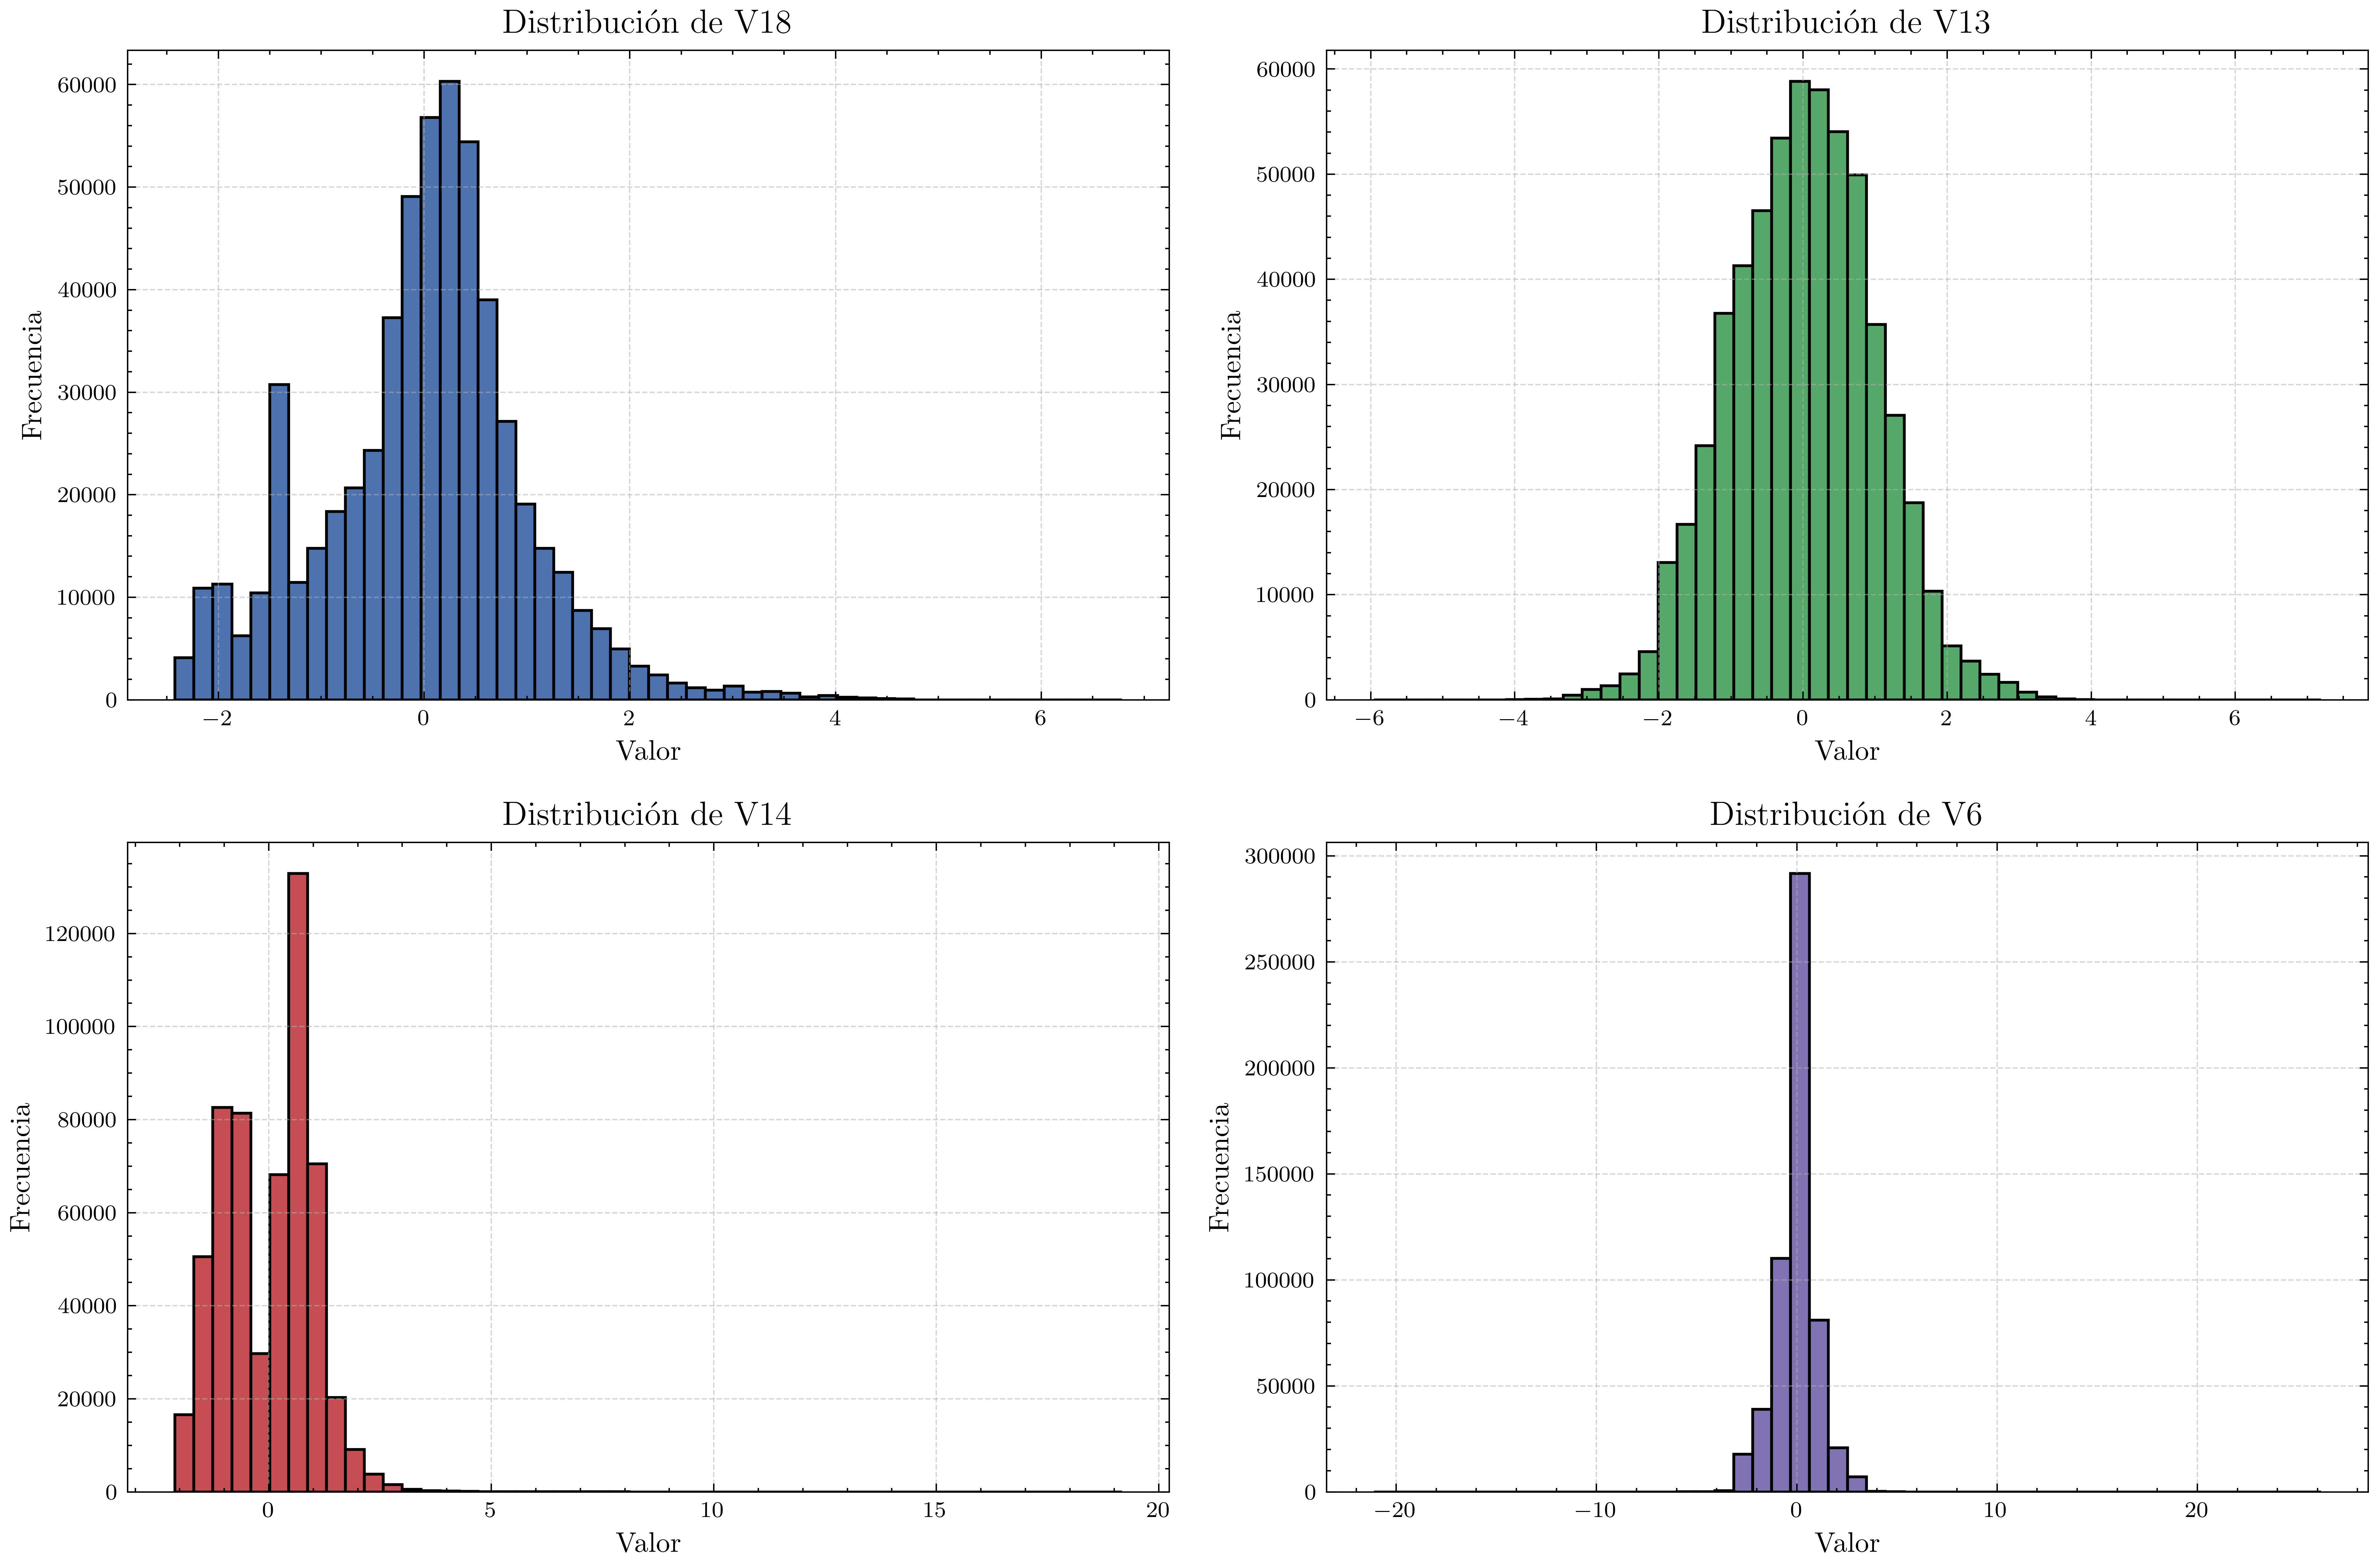

In [18]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Aplicar el estilo "science" y desactivar LaTeX
plt.style.use('science')

# Lista de colores proporcionados
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3", "#CCB974", "#64B5CD"]

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Seleccionar 4 columnas aleatorias para visualizarlas en consola
random_cols = random.sample(num_cols, 4)

# Crear carpeta para guardar todos los histogramas
output_folder = "histogramas_png"
os.makedirs(output_folder, exist_ok=True)

# Guardar cada histograma en PNG con colores rotativos
for i, col in enumerate(num_cols):
    color = colors[i % len(colors)]  # Asignar un color cíclicamente
    
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(df[col].dropna(), bins=50, color=color, edgecolor="black")
    ax.set_title(f"Distribución de {col}", fontsize=12)
    ax.set_xlabel("Valor", fontsize=10)
    ax.set_ylabel("Frecuencia", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.5)
    fig.tight_layout()
    
    filepath = os.path.join(output_folder, f"histograma_{col}.png")
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Crear figura unificada para mostrar en consola los histogramas de las columnas aleatorias
fig_unificado, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()  # Para iterar de forma sencilla sobre los ejes

for i, col in enumerate(random_cols):
    color = colors[i % len(colors)]  # Asignar un color de la lista
    axs[i].hist(df[col].dropna(), bins=50, color=color, edgecolor="black")
    axs[i].set_title(f"Distribución de {col}", fontsize=12)
    axs[i].set_xlabel("Valor", fontsize=10)
    axs[i].set_ylabel("Frecuencia", fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=8)
    axs[i].grid(True, linestyle='--', alpha=0.5)

fig_unificado.tight_layout()
plt.show()

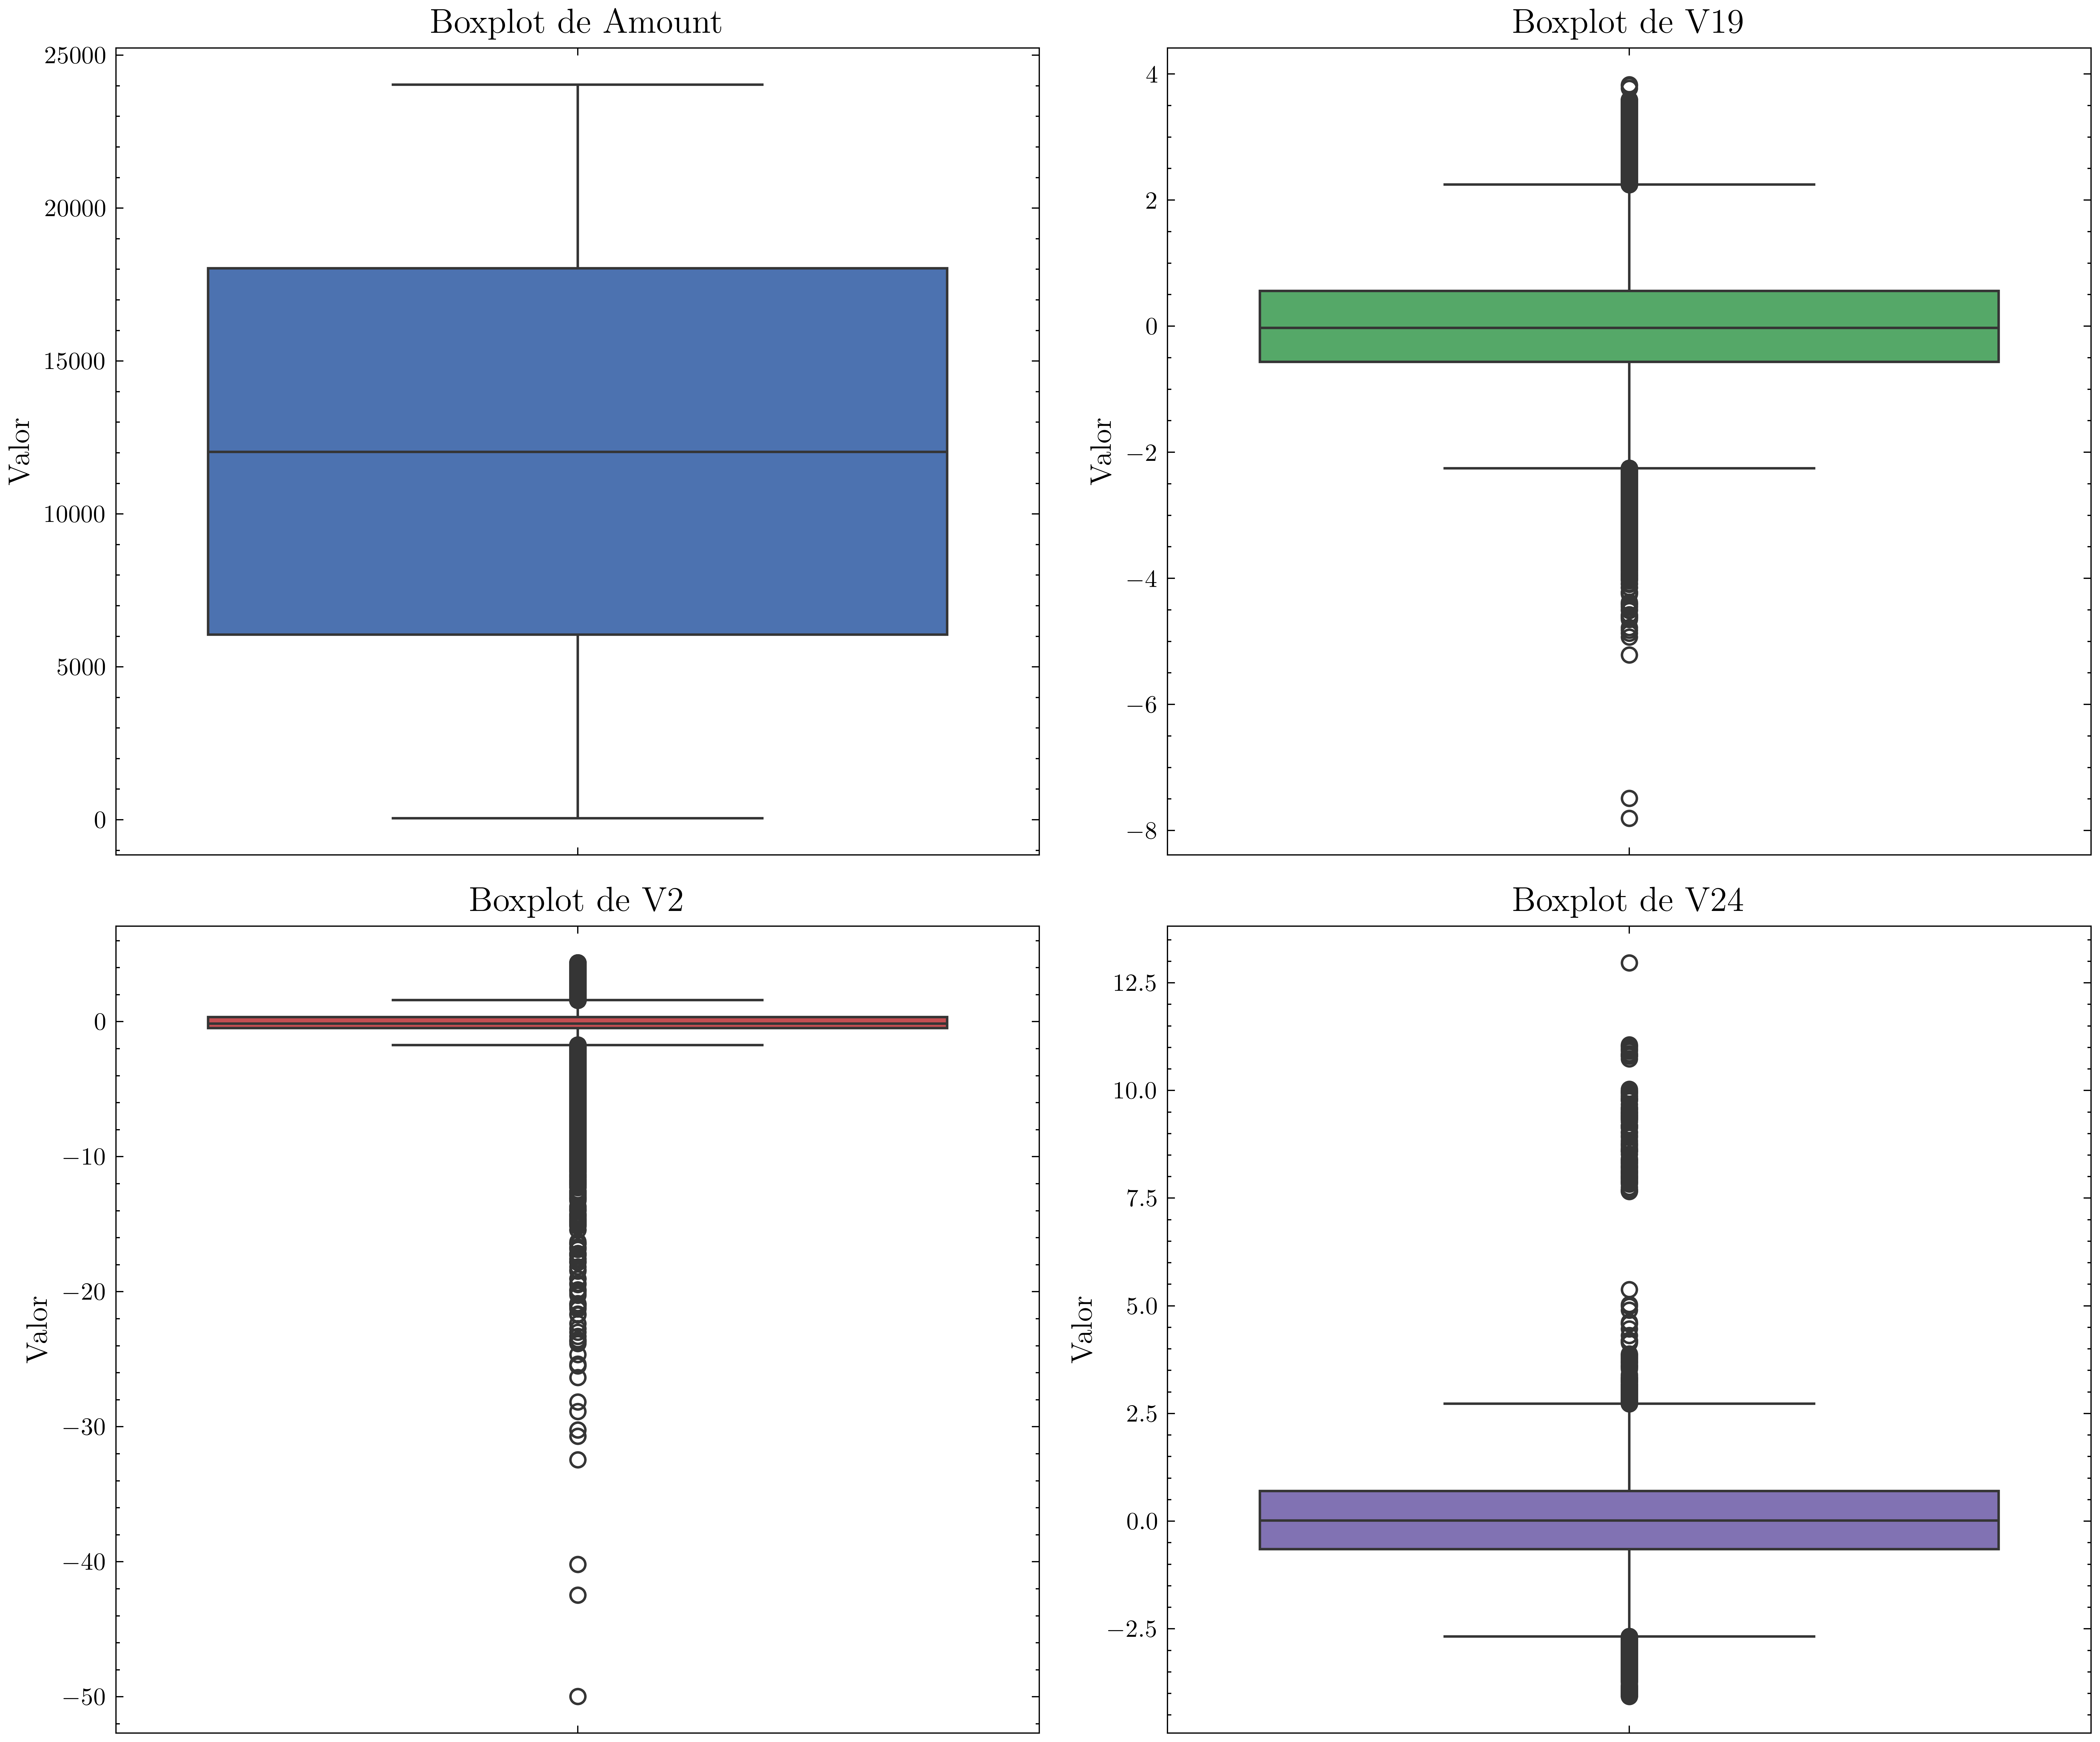

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar el estilo Science (incluye 'ieee' y evita LaTeX con 'no-latex')
plt.style.use('science')

# Lista de colores proporcionados
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3", "#CCB974", "#64B5CD"]

# Seleccionar 4 columnas aleatorias (se asume que el dataframe df ya está definido)
sampled_cols = np.random.choice(df.columns, 4, replace=False)

# Crear una figura con una grilla 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Ajustar tamaño de fuente para mayor claridad
plt.rcParams.update({'font.size': 12})

# Iterar sobre los ejes y las columnas seleccionadas para graficar cada boxplot
for i, (ax, col) in enumerate(zip(axs.flatten(), sampled_cols)):
    color = colors[i % len(colors)]  # Asignar un color cíclicamente
    sns.boxplot(y=df[col], ax=ax, boxprops=dict(facecolor=color))
    ax.set_title(f"Boxplot de {col}", fontsize=14)
    ax.set_ylabel("Valor", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel("")  # Opcional: quitar el label del eje x

plt.tight_layout()
plt.show()


Los datos estan muy comprimidos tocara aplicar intercuartiles

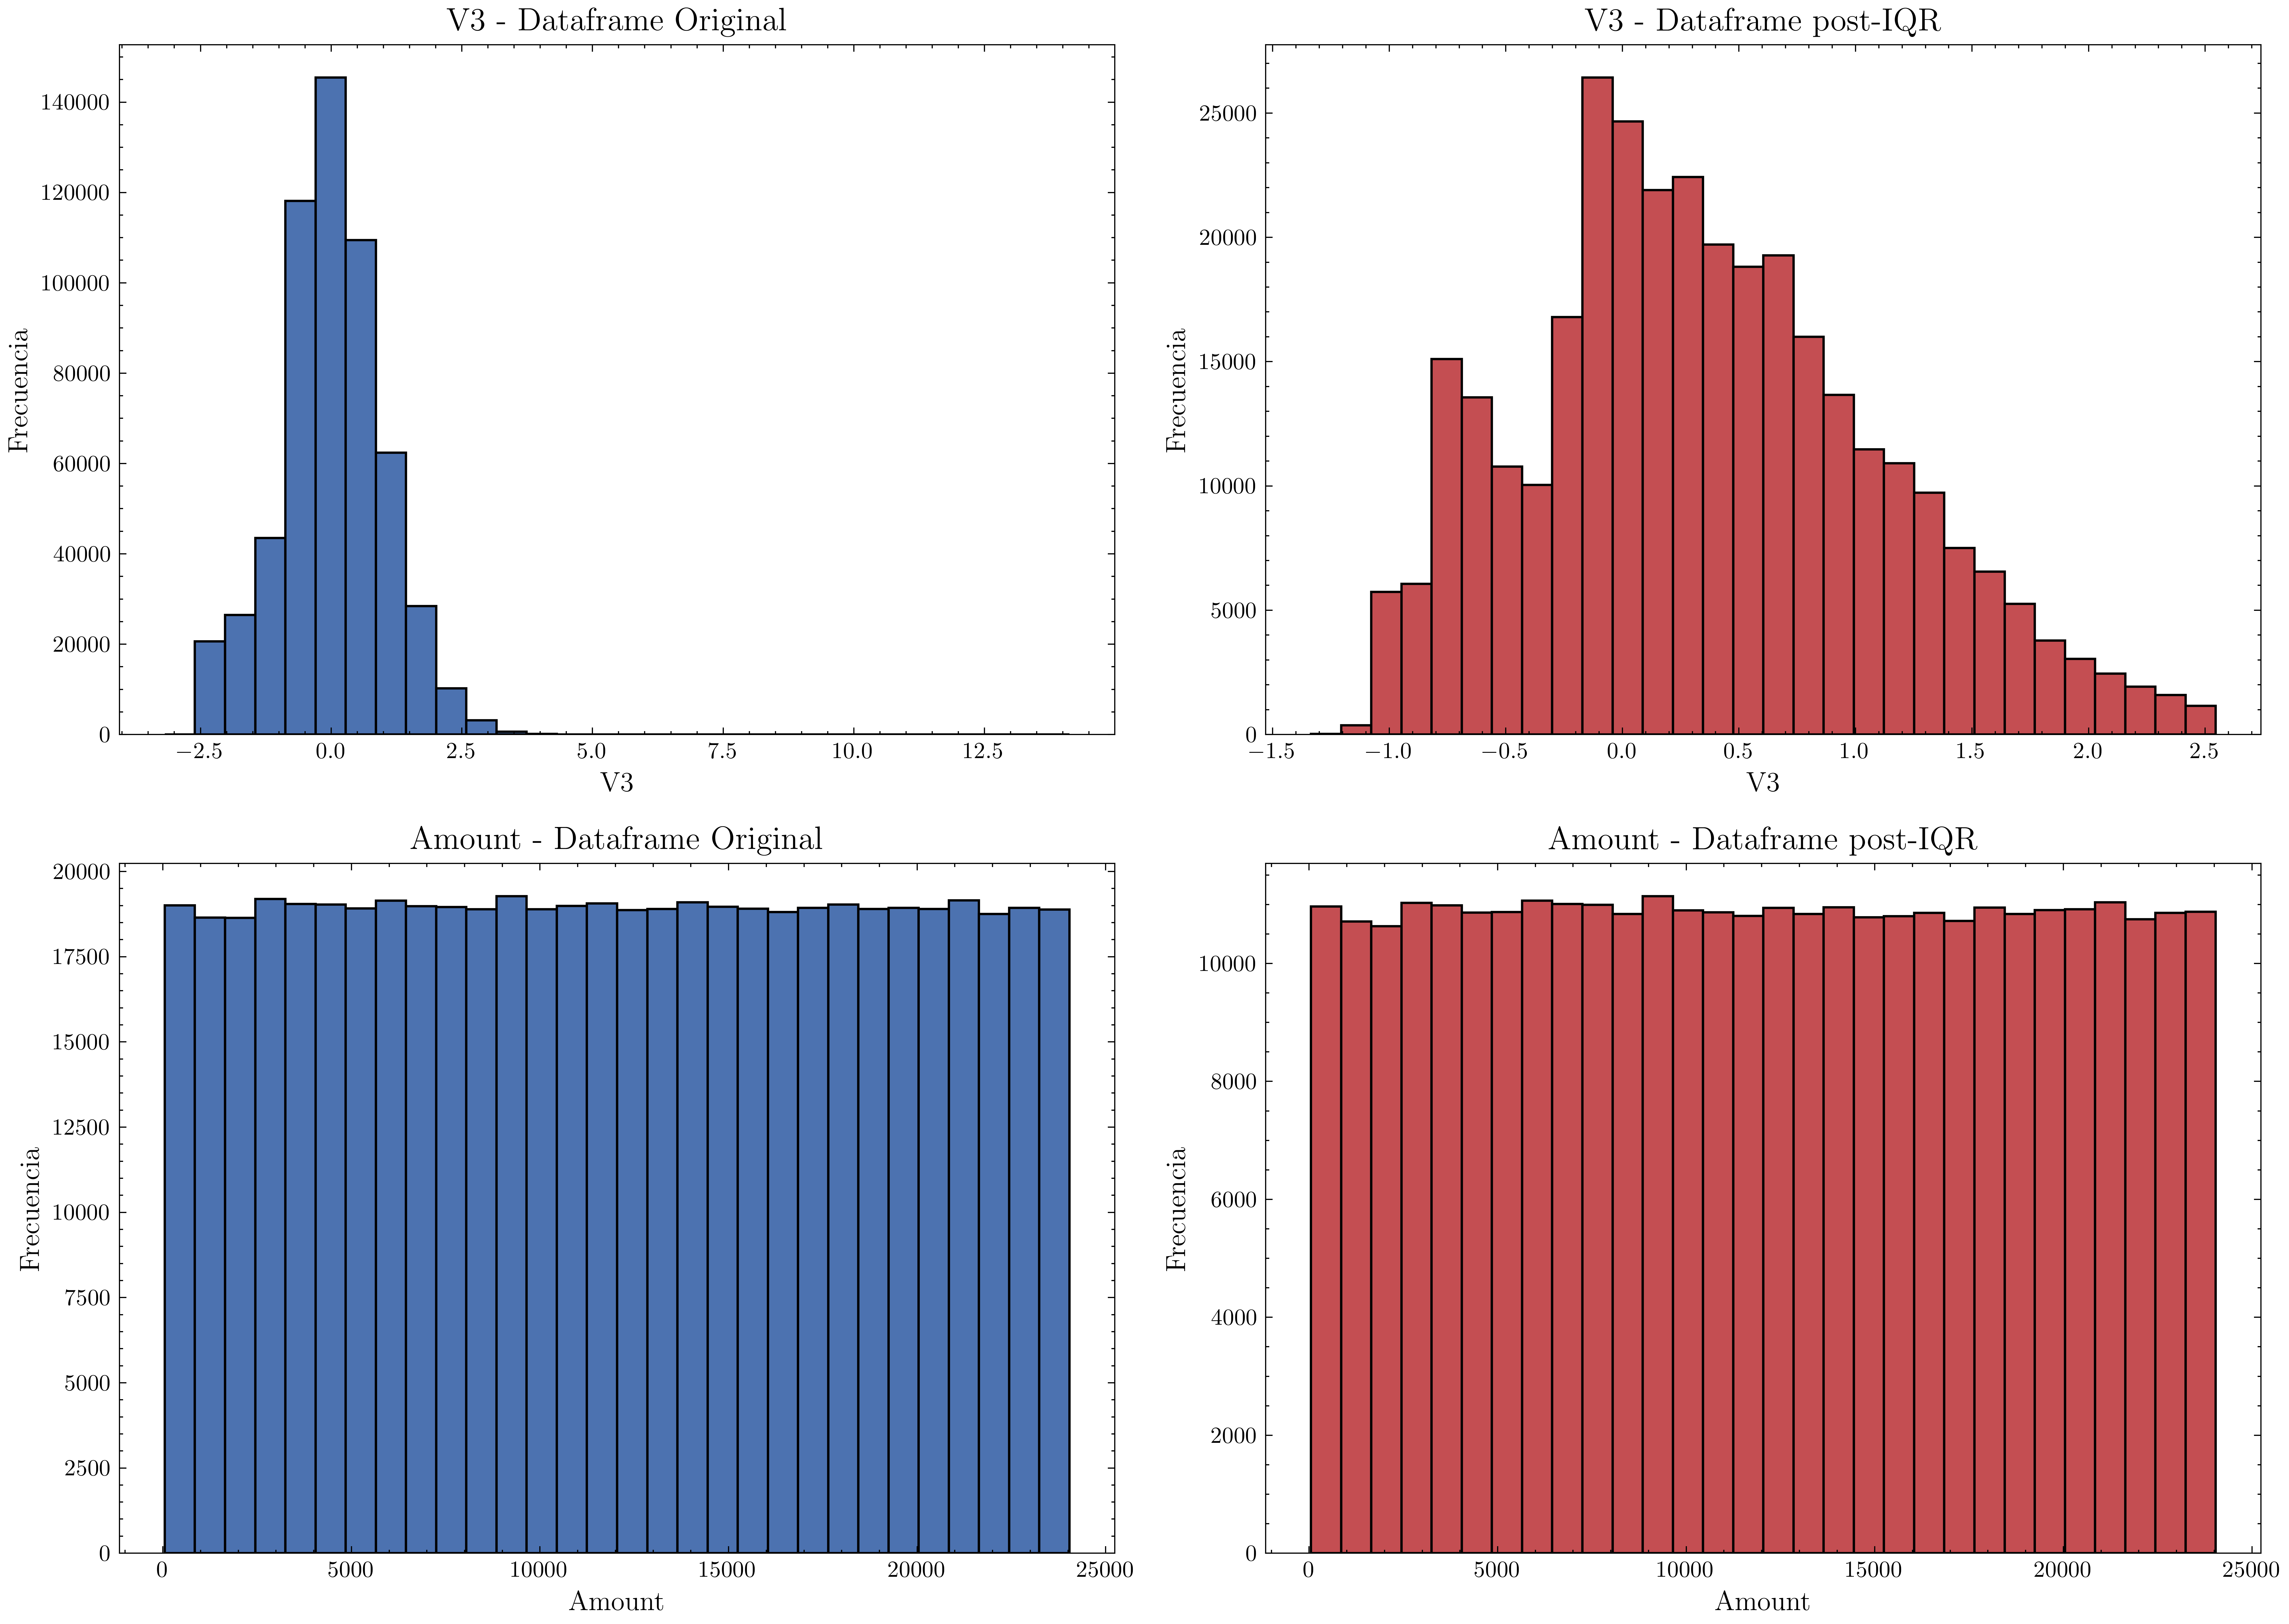

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar la librería scienceplots
plt.style.use(['science'])  # Estilo científico

# Cargar los dataframes
df1 = pd.read_csv(r'C:\Users\spinz\OneDrive\Documentos\Portafolio oficial\Sentinela_financiera\data\processed\Datosiqr\filtered_data.csv')

# Lista de colores
color_original = "#4C72B0"  # Azul para datos originales
color_filtered = "#C44E52"  # Rojo para datos post-IQR

# Seleccionar dos columnas aleatorias
selected_cols = np.random.choice(df.columns, 2, replace=False)

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Iterar sobre las columnas seleccionadas para graficar cada distribución
for i, col in enumerate(selected_cols):
    # Histograma para df (columna izquierda)
    axes[i, 0].hist(df[col].dropna(), bins=30, color=color_original, edgecolor='black')
    axes[i, 0].set_title(f'{col} - Dataframe Original', fontsize=14)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Frecuencia', fontsize=12)
    axes[i, 0].tick_params(axis='both', labelsize=10)
    
    # Histograma para df1 (columna derecha)
    axes[i, 1].hist(df1[col].dropna(), bins=30, color=color_filtered, edgecolor='black')
    axes[i, 1].set_title(f'{col} - Dataframe post-IQR', fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=12)
    axes[i, 1].set_ylabel('Frecuencia', fontsize=12)
    axes[i, 1].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


#ver si los datos estan correlacionados

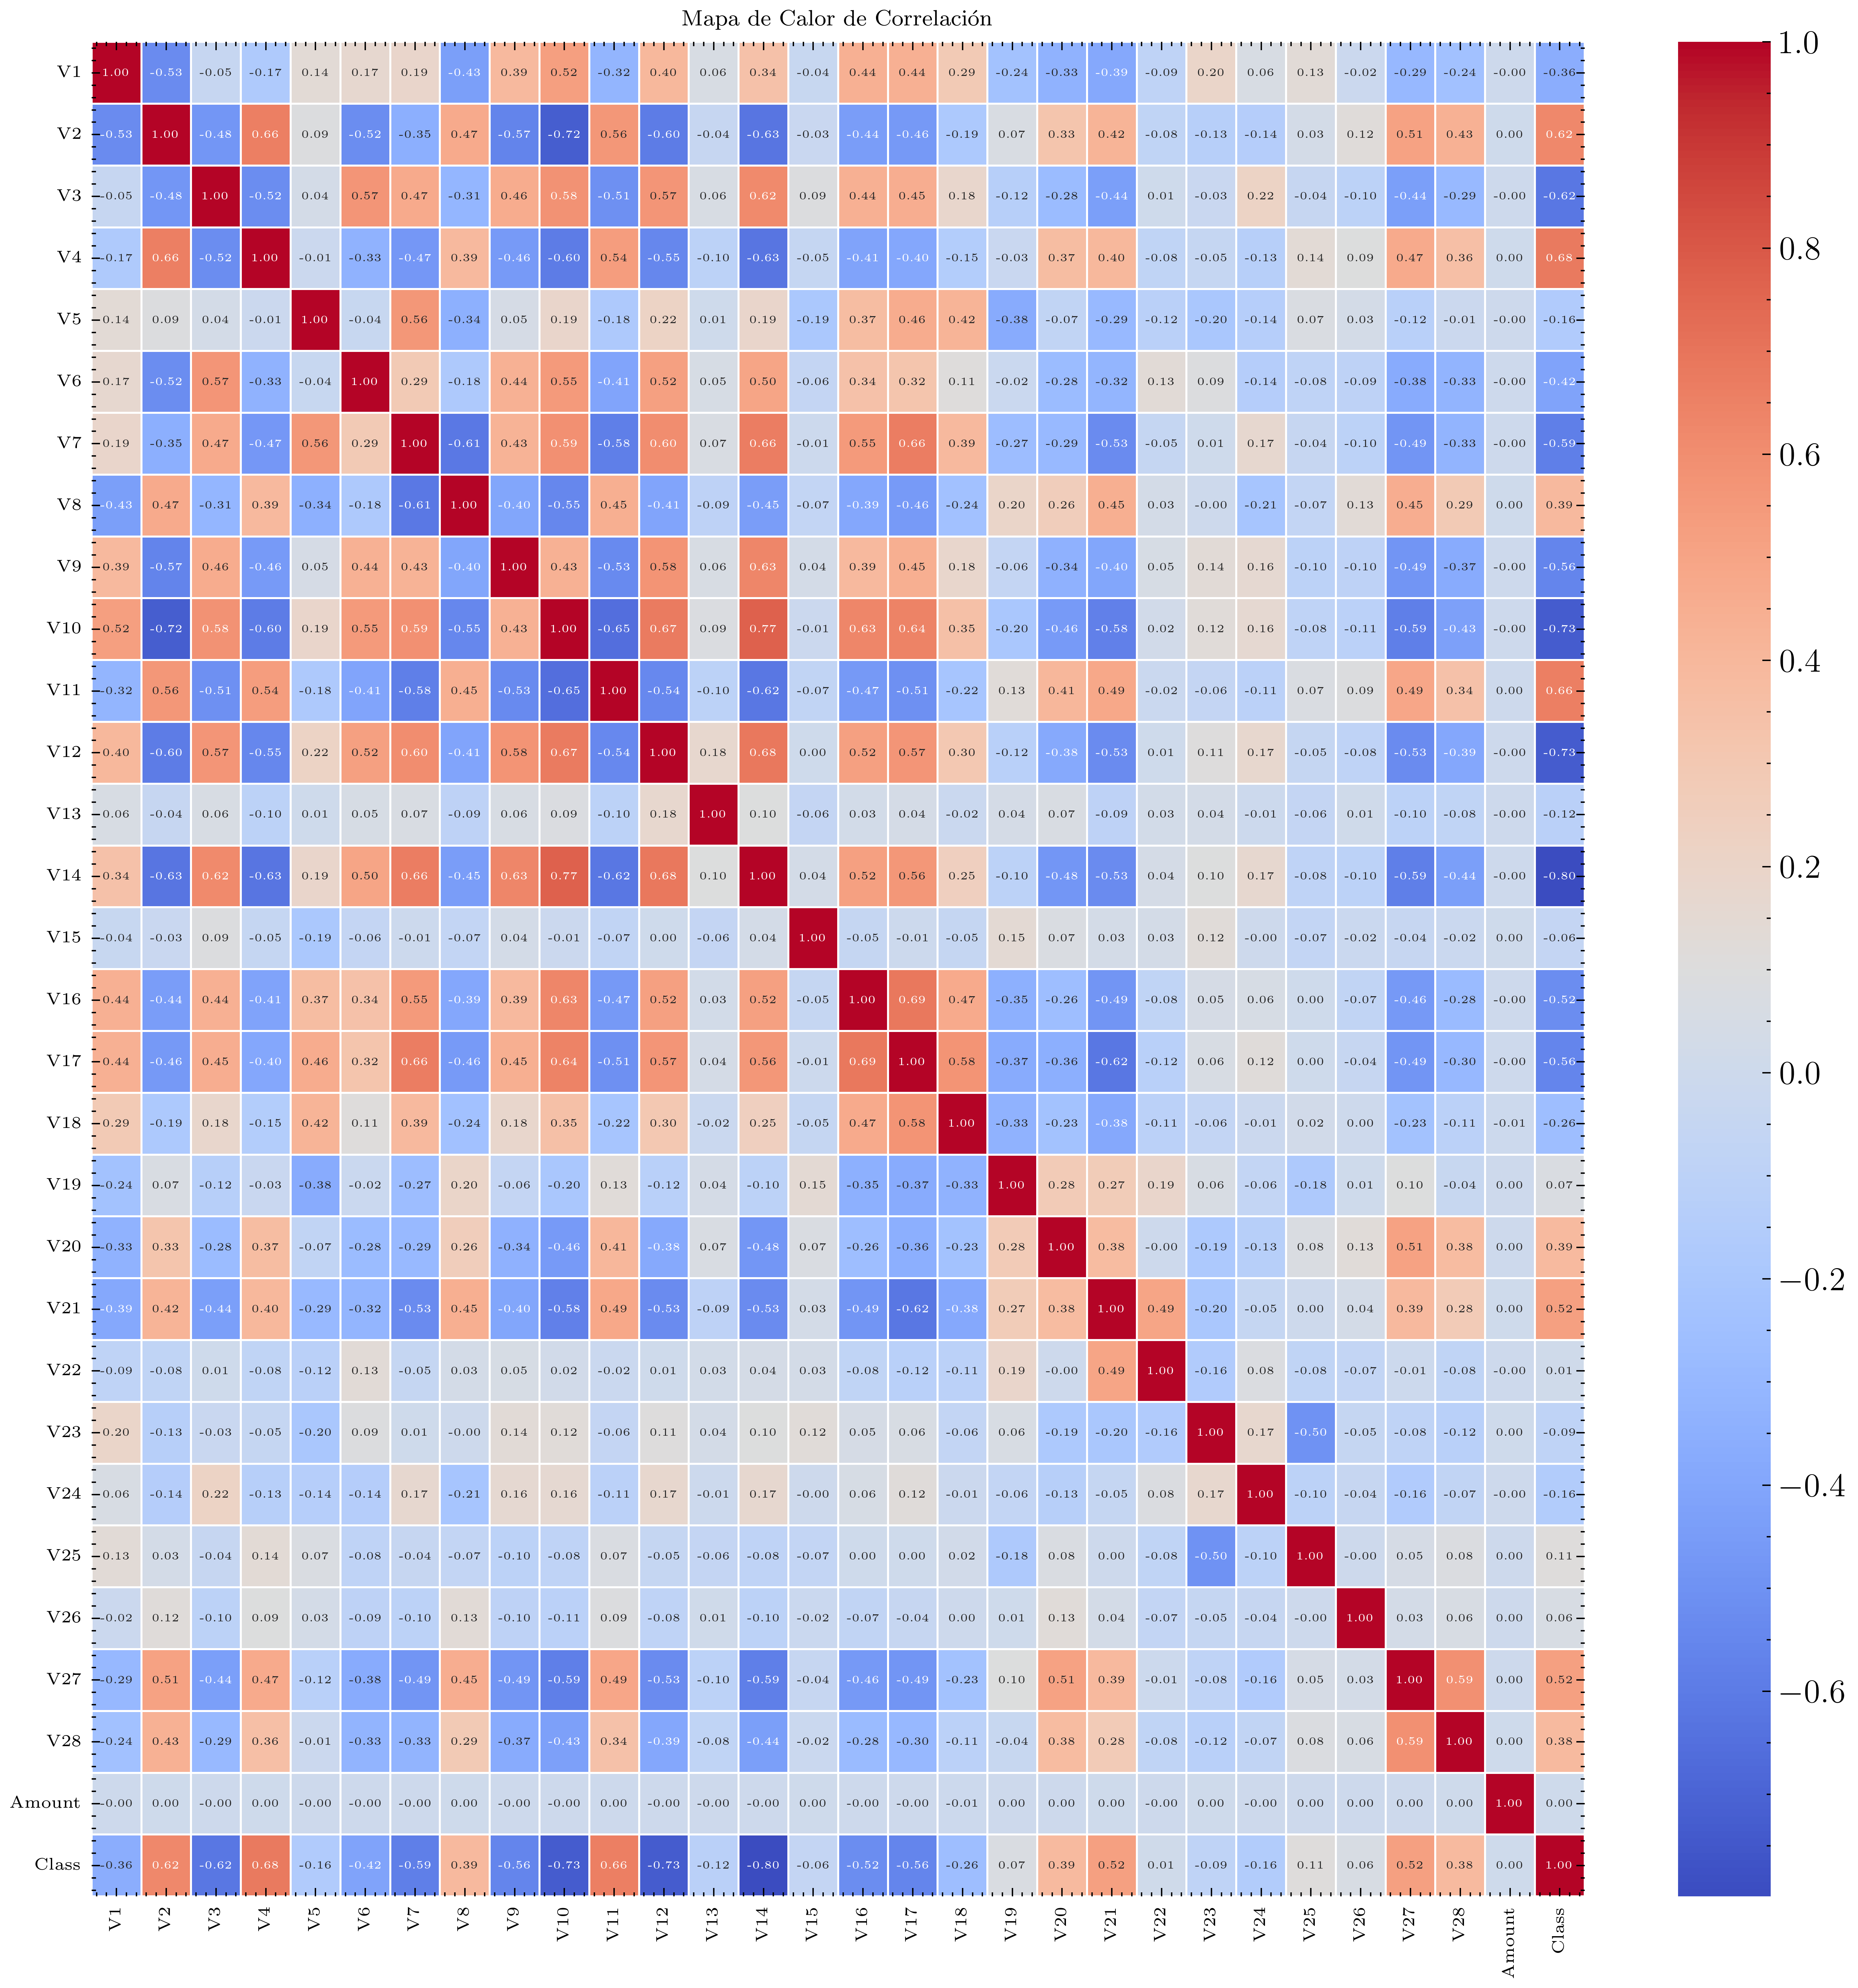

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar el estilo Science
plt.style.use('science')

# Asegurar que la columna 'id' esté incluida en la matriz de correlación
df1 = df1.set_index('id')  # Si 'id' es un índice, convertirlo en columna numérica si es posible
corr_matrix = df1.corr()

# Ajustar el tamaño de la figura dinámicamente
fig_width = max(12, 0.4 * len(corr_matrix.columns))
fig_height = max(10, 0.4 * len(corr_matrix.columns))
plt.figure(figsize=(fig_width, fig_height))

# Crear el heatmap con ajuste de tamaño de fuente
tick_fontsize = max(6, min(12, 180 / len(corr_matrix.columns)))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True, 
            annot_kws={"size": tick_fontsize - 2})

# Configurar título y tamaño de fuente
plt.title("Mapa de Calor de Correlación", fontsize=tick_fontsize + 2)
plt.xticks(fontsize=tick_fontsize, rotation=90)
plt.yticks(fontsize=tick_fontsize)

plt.show()


tocara probar distintas combinaciones entre ellas utilizar solo las columnas que bedezcan 0.5 y -0,5

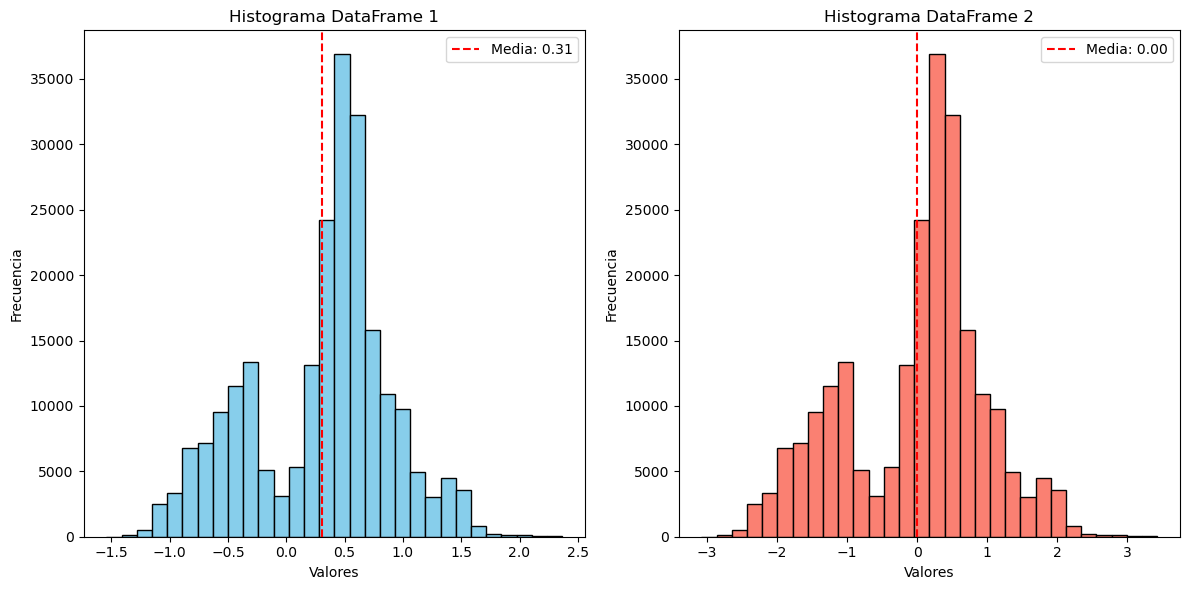

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los DataFrames
df_train_normal = pd.read_csv(r'C:\Users\spinz\OneDrive\Documentos\Portafolio oficial\Sentinela_financiera\data\processed\train_test_validation\X_train.csv')
df_train_scaled = pd.read_csv(r'C:\Users\spinz\OneDrive\Documentos\Portafolio oficial\Sentinela_financiera\data\processed\train_test_validation_scaled\train_features.csv')

# Calcular la media para la columna 'V10'
mean_normal = df_train_normal['V10'].mean()
mean_scaled = df_train_scaled['V10'].mean()

# Crear dos subplots (gráficos) uno al lado del otro
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Histograma para el DataFrame 1
ax1.hist(df_train_normal['V10'], bins=30, color='skyblue', edgecolor='black')
ax1.axvline(mean_normal, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {mean_normal:.2f}')
ax1.set_title('Histograma DataFrame 1')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Frecuencia')
ax1.legend()

# Histograma para el DataFrame 2
ax2.hist(df_train_scaled['V10'], bins=30, color='salmon', edgecolor='black')
ax2.axvline(mean_scaled, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {mean_scaled:.2f}')
ax2.set_title('Histograma DataFrame 2')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Frecuencia')
ax2.legend()

plt.tight_layout()
plt.show()
